### Lab 08 - Fourier Transformation

1. Apply high pass laplacian filter on Car.jpg image.

In [112]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [113]:
# Defining required functions
def show_2_images(image1, image2, title1, title2):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    plt.show()

def show_3_images(image1, image2, image3, title1, title2, title3):
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    ax[2].imshow( image3, cmap='gray')
    ax[2].set_title(title3)

    plt.show()

In [114]:
# Reading the image
img = plt.imread('car-2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [115]:
def high_pass_laplacian_filter(img):
    # Convert image to float32 for DFT processing
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create Laplacian high-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.uint8)
    
    # Create a Laplacian filter in the frequency domain
    X = np.linspace(-ccol, ccol, cols)
    Y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(X, Y)
    laplacian_mask = -4 * (np.pi**2) * (X**2 + Y**2)
    laplacian_mask[crow, ccol] = 1  # Avoiding division by zero

    laplacian_mask = np.dstack((laplacian_mask, laplacian_mask))

    # Apply Laplacian high-pass filter
    fshift = dft_shift * laplacian_mask
    
    # Inverse shift to bring back to original position
    f_ishift = np.fft.ifftshift(fshift)
    
    # Inverse DFT to get the filtered image
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # Normalize the filtered image to 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return img_back, laplacian_mask[:,:,0]

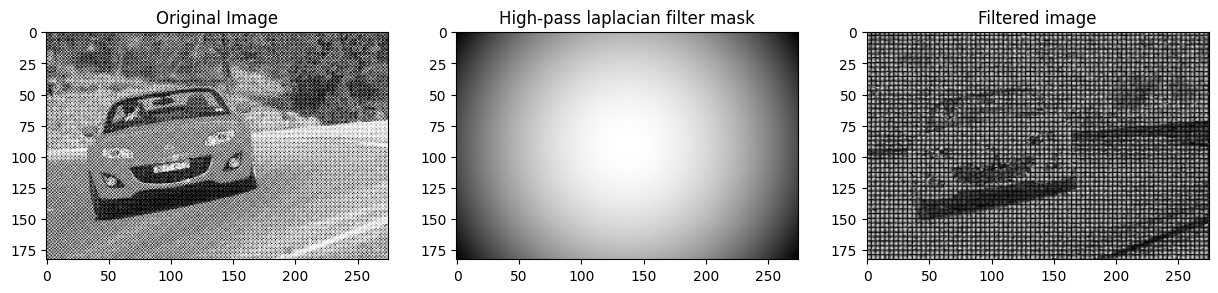

In [116]:
# Apply the high-pass filter
filtered_image, mask = high_pass_laplacian_filter(gray_img)
show_3_images(gray_img, mask, filtered_image, 'Original Image', 'High-pass laplacian filter mask', 'Filtered image')

2. Apply ideal high-pass filter on Car.jpg image for D0=100

In [117]:
def ideal_high_pass_filter(img, d0=100):
    # Convert image to float32 for DFT processing
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create ideal high-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.uint8)
    
    # Create a circular mask with radius d0
    center = (ccol, crow)
    for i in range(rows):
        for j in range(cols):
            if (i - crow) ** 2 + (j - ccol) ** 2 <= d0 ** 2:
                mask[i, j] = 0

    # Apply mask in frequency domain
    fshift = dft_shift * mask
    
    # Inverse shift to bring back to original position
    f_ishift = np.fft.ifftshift(fshift)
    
    # Inverse DFT to get the filtered image
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # Normalize the filtered image to 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Convert mask to uint8 for display
    mask_img = np.uint8(mask[:,:,0] * 255)

    return img_back, mask_img

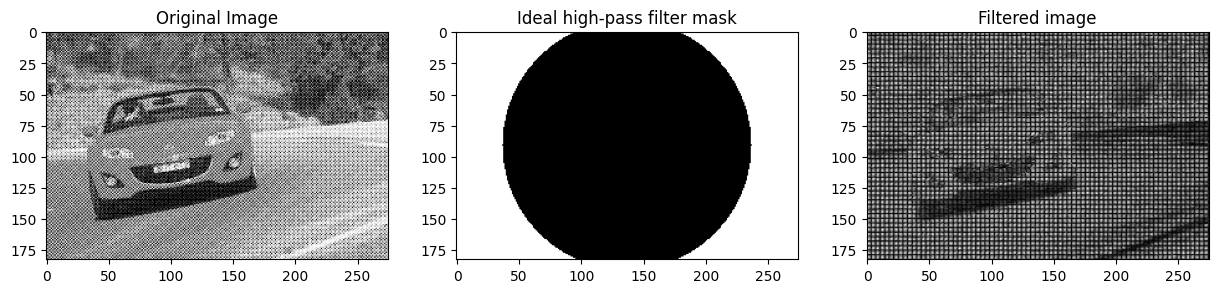

In [118]:
filtered_image, mask = ideal_high_pass_filter(gray_img, 100)
show_3_images(gray_img, mask, filtered_image, 'Original Image', 'Ideal high-pass filter mask', 'Filtered image')

3. Apply ideal low-pass filter on Car.jpg image for D0=100

In [119]:
def ideal_low_pass_filter(img, d0=100):
    # Convert image to float32 for DFT processing
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create ideal low-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    
    # Create a circular mask with radius d0
    center = (ccol, crow)
    for i in range(rows):
        for j in range(cols):
            if (i - crow) ** 2 + (j - ccol) ** 2 <= d0 ** 2:
                mask[i, j] = 1

    # Apply mask in frequency domain
    fshift = dft_shift * mask
    
    # Inverse shift to bring back to original position
    f_ishift = np.fft.ifftshift(fshift)
    
    # Inverse DFT to get the filtered image
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # Normalize the filtered image to 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Convert mask to uint8 for display
    mask_img = np.uint8(mask[:,:,0] * 255)

    return img_back, mask_img

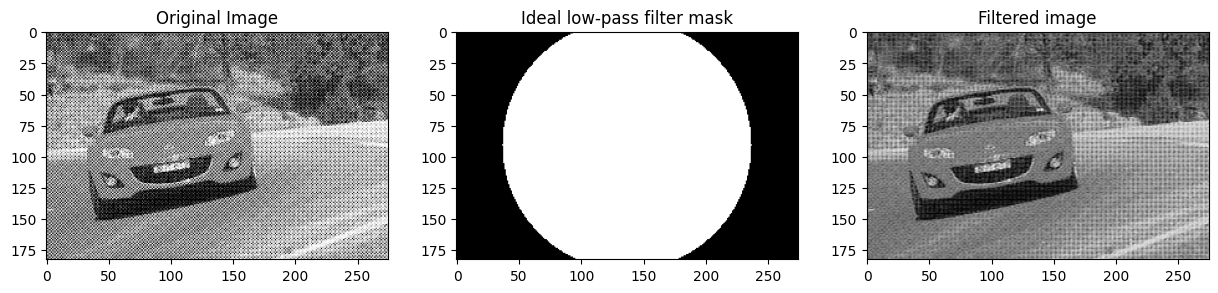

In [120]:
filtered_image, mask = ideal_low_pass_filter(gray_img, 100)
show_3_images(gray_img, mask, filtered_image, 'Original Image', 'Ideal low-pass filter mask', 'Filtered image')

4. Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.

In [121]:
def low_pass_gaussian_filter(img, sigma=10): 
    # Convert image to float32 for DFT processing
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    dft = np.fft.fft2(img_float32)
    dft_shift = np.fft.fftshift(dft)

    # Create Gaussian low-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    gaussian_mask = np.exp(- (X**2 + Y**2) / (2 * sigma**2))
    
    # Apply Gaussian low-pass filter
    low_pass_filtered = dft_shift * gaussian_mask
    
    # Inverse shift to bring back to original position
    f_ishift = np.fft.ifftshift(low_pass_filtered)
    
    # Inverse DFT to get the filtered image
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    # Normalize the filtered image to 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return img_back, gaussian_mask

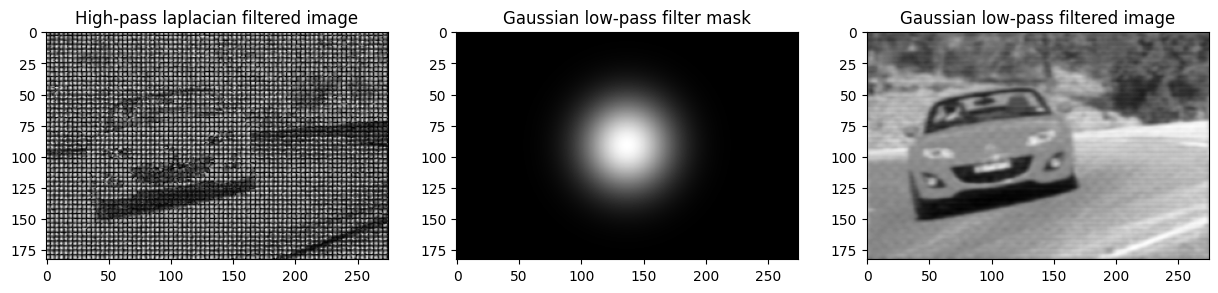

In [122]:
laplacian_filtered_image, mask = high_pass_laplacian_filter(gray_img)
gaussian_filtered_image, mask = low_pass_gaussian_filter(gray_img, 25)
show_3_images(laplacian_filtered_image, mask, gaussian_filtered_image, 'High-pass laplacian filtered image', 'Gaussian low-pass filter mask', 'Gaussian low-pass filtered image')

5. Apply the necessary filter and correct the noise in the image.

In [123]:
def gaussian_filter_in_frequency_domain(img, sigma=25):
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    transformed_img = np.fft.fft2(img_float32)
    fftshift_img = np.fft.fftshift(transformed_img)

    # Get the height and width of the image
    height, width = img.shape

    # Create a Gaussian filter
    x = np.linspace(-width//2, width//2, width)
    y = np.linspace(-height//2, height//2, height)
    X, Y = np.meshgrid(x, y)
    gaussian_filter = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Apply Gaussian filter in the frequency domain
    filtered_fftshift_img = fftshift_img * gaussian_filter
    
    # Compute the inverse shift to bring back to original position
    filtered_img = np.fft.ifftshift(filtered_fftshift_img)
    
    # Compute the inverse DFT to get the filtered image
    filtered_img = np.fft.ifft2(filtered_img)
    filtered_img = np.abs(filtered_img)
    
    # Normalize the filtered image to 0-255
    filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return filtered_img, gaussian_filter

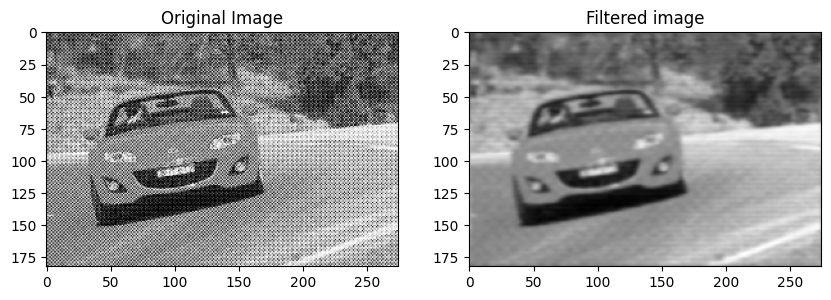

In [124]:
filtered_image, mask = gaussian_filter_in_frequency_domain(gray_img, 25)
show_2_images(img, filtered_image, 'Original Image', 'Filtered image')

6. Apply the sobel operator (filter) on Car.jpg in the Fourier domain to detect edges.

In [125]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Apply Sobel operator in X direction
    sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
    
    # Apply Sobel operator in Y direction
    sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
    
    # Calculate the gradient magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    return magnitude

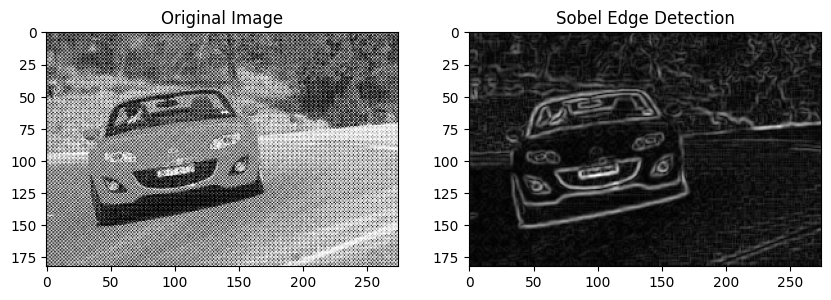

In [126]:
img = cv2.imread('car-2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_image = sobel_edge_detection(img)
show_2_images(img, sobel_image, 'Original Image', 'Sobel Edge Detection')

In [127]:
def sobel_filter(img):
# Convert image to float32 for DFT processing
    img_float32 = np.float32(img)
    
    # Compute 2D Fourier transform
    dft = np.fft.fft2(img_float32)
    dft_shift = np.fft.fftshift(dft)

    # Get dimensions of the image
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    # Create frequency domain grid
    u = np.fft.fftfreq(cols).reshape(1, -1)
    v = np.fft.fftfreq(rows).reshape(-1, 1)
    
    # Sobel filters in the frequency domain
    sobel_x_freq = 1j * 2 * np.pi * u
    sobel_y_freq = 1j * 2 * np.pi * v

    # Apply Sobel filters in the frequency domain
    dft_shift_sobel_x = dft_shift * sobel_x_freq
    dft_shift_sobel_y = dft_shift * sobel_y_freq

    # Inverse shift to bring back to original position
    sobel_x_img = np.fft.ifftshift(dft_shift_sobel_x)
    sobel_y_img = np.fft.ifftshift(dft_shift_sobel_y)

    # Inverse Fourier transform to obtain filtered images
    sobel_x_filtered = np.fft.ifft2(sobel_x_img)
    sobel_y_filtered = np.fft.ifft2(sobel_y_img)
    
    # Compute magnitude of gradients
    edge_detected_img = np.sqrt(np.abs(sobel_x_filtered)**2 + np.abs(sobel_y_filtered)**2)
    
    # Normalize the edge-detected image to 0-255
    edge_detected_img = cv2.normalize(np.abs(edge_detected_img), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return edge_detected_img

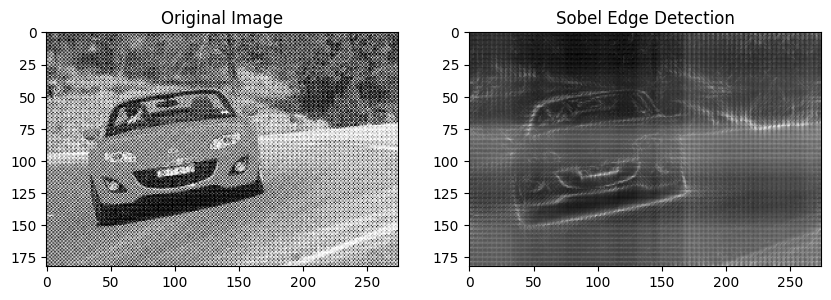

In [128]:
sobel_filtered_image = sobel_filter(gray_img)
show_2_images(gray_img, sobel_filtered_image, 'Original Image', 'Sobel Edge Detection')

7. Discuss applying Butterworth and Chebyshev filters and compare the output image with the
Gaussian Filter image

In [129]:
from scipy import fftpack

def butterworth_filter(image, cutoff, n):
    fft_image = fftpack.fft2(image)
    fft_shifted = fftpack.fftshift(fft_image)
    
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create Butterworth Filter
    butterworth_filter = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            butterworth_filter[i, j] = 1 / (1 + (dist / cutoff)**(2*n))
    
    # Apply the filter
    filtered = fft_shifted * butterworth_filter
    filtered = fftpack.ifftshift(filtered)
    filtered_image = fftpack.ifft2(filtered).real
    
    return np.uint8(filtered_image)

def chebyshev_filter(image, cutoff, n, ripple_db):
    fft_image = fftpack.fft2(image)
    fft_shifted = fftpack.fftshift(fft_image)
    
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create Chebyshev Filter
    chebyshev_filter = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            chebyshev_filter[i, j] = 1 / np.sqrt(1 + (dist / cutoff)**(2*n))
    
    # Apply the filter
    filtered = fft_shifted * chebyshev_filter
    filtered = fftpack.ifftshift(filtered)
    filtered_image = fftpack.ifft2(filtered).real
    
    return np.uint8(filtered_image)

def gaussian_filter(image, sigma=1.0):
    return cv2.GaussianBlur(image, (0, 0), sigma)

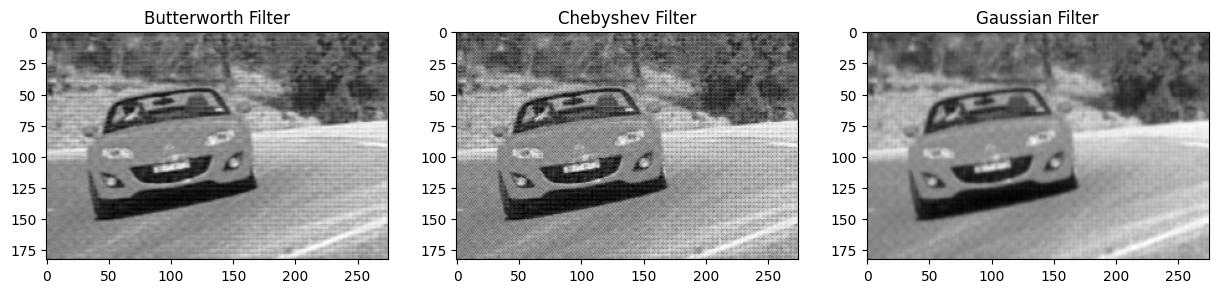

In [130]:
image = cv2.imread('car-2.jpg', cv2.IMREAD_GRAYSCALE)
butterworth_filtered = butterworth_filter(image, 50, 2)
chebyshev_filtered = chebyshev_filter(image, 50, 2, 1)
gaussian_filtered = gaussian_filter(image, 1.2)
show_3_images(butterworth_filtered, chebyshev_filtered, gaussian_filtered, 'Butterworth Filter', 'Chebyshev Filter', 'Gaussian Filter')

Gaussian Filter: Produces a blurred or smoothed image, suitable for noise reduction and general-purpose smoothing.

Butterworth Filter: Offers a balance between edge preservation and smoothing, suitable for applications where some level of detail preservation is important.

Chebyshev Filter: Provides sharp filtering with controlled passband ripple, useful for applications requiring precise edge enhancement or detection.